LINEAR REGRESSION AND NAIVE BAYES:

Purpose:
    -The purpose of this project is to test the accuracy of Linear Regression and Naive Bayes on a continuous data set 

Implementation:
    -This test will be carried out by implementing Linear Regression and Naive Bayes models and test that model on a data set for diabetic patients
    -These models will take in the information of multiples diabetic patients and make prediction on whether someone with a certain background can have diabetes or not
    -We will then compare the accuracy of these two models and give an explanation for it

Prediction:
    -We predict that the linear regression model will generally have a better accuracy as the general form of Naive Bayes works best for binary data set (ex: yes or no, true or false, 1 or 0)


DIABETES PREDICTION:
The following are the steps to predict diabetes using the given dataset. This model will be using Naive Baye's and Logistic Regression to train the model.

Columns:
+ Prenancies
+ Glucose
+ Blood Pressure
+ Skin Thickness
+ Insulin
+ BMI
+ DiabetesPedigreeFunction
+ Age
+ Outcome

Import data:

In [3]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


More details about the data:

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
#Check to make sure if any empty data slot
data_copy = data.isna().any().any()
data_copy

False

Visualize the current data distribution:

<Figure size 2000x2000 with 0 Axes>

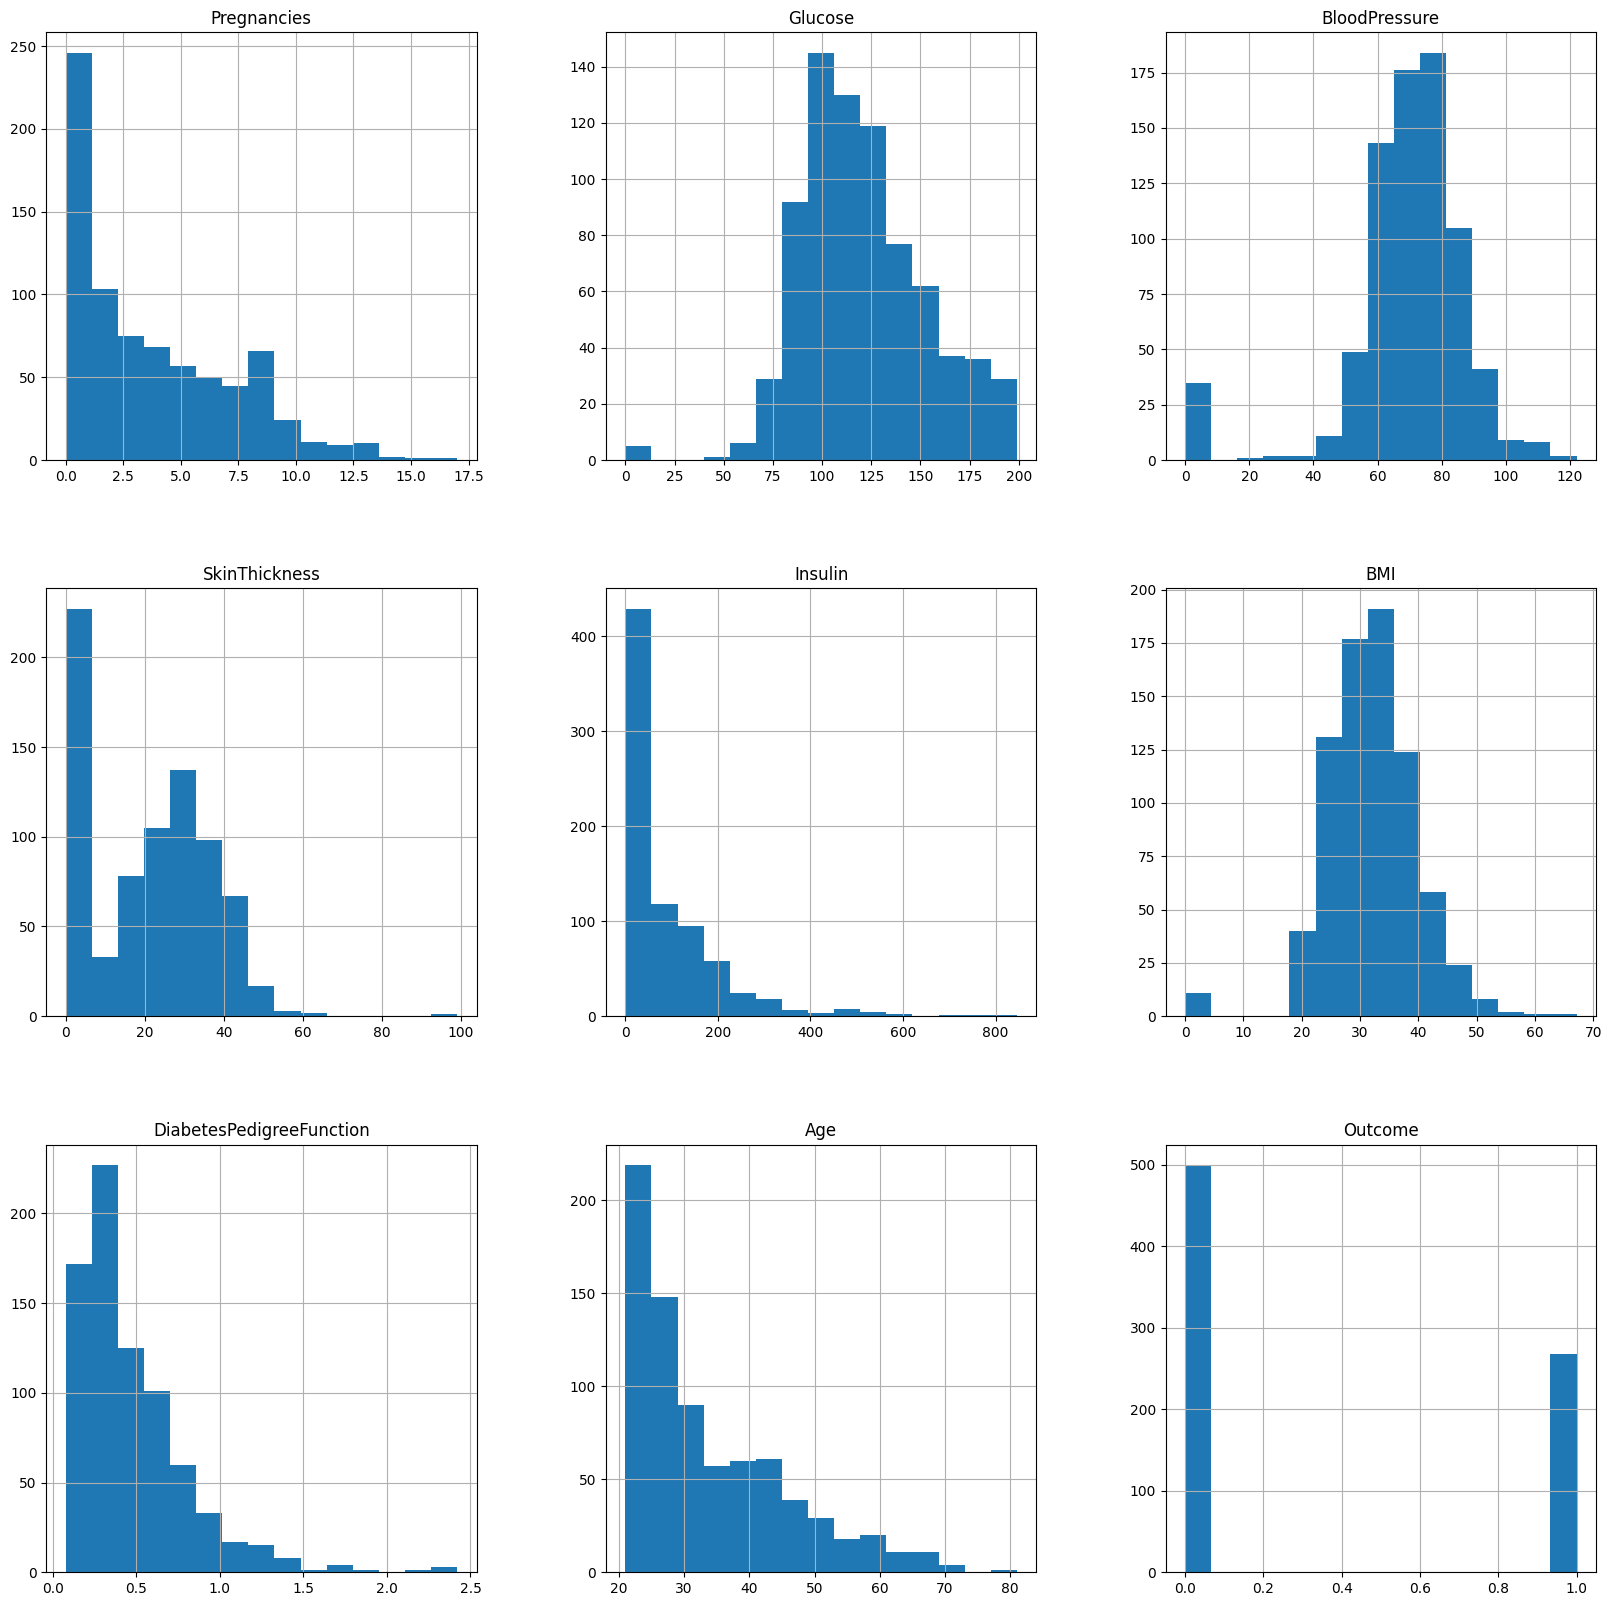

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
data.hist(figsize=(20,20), bins = 15)
plt.show()

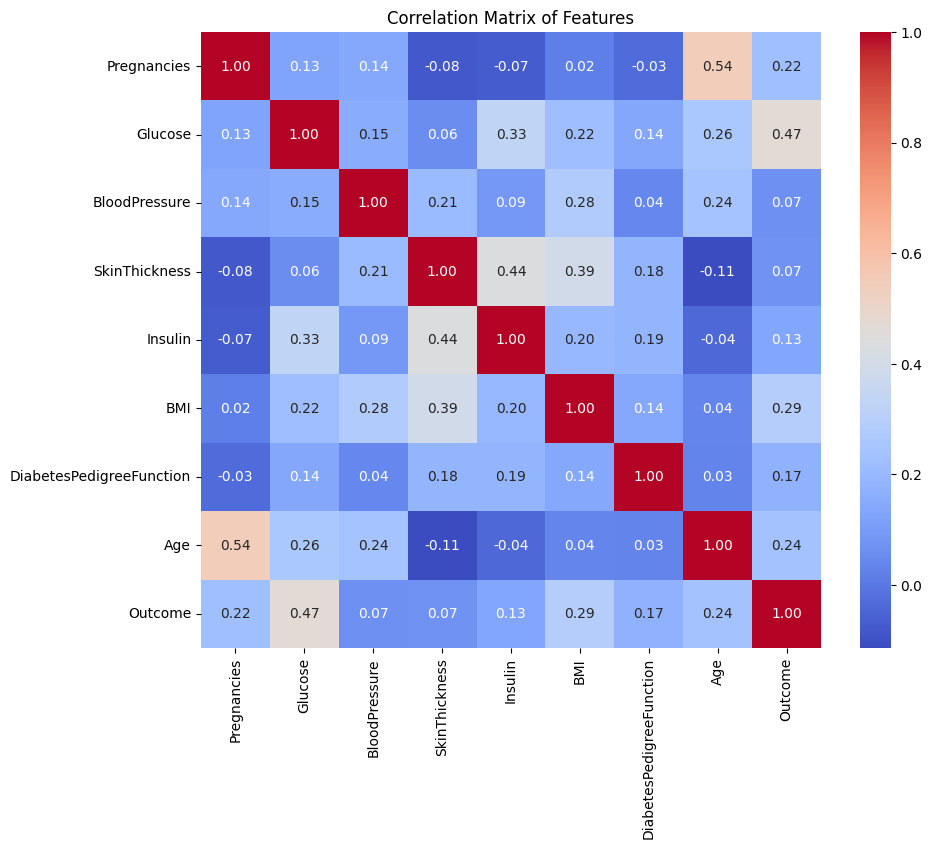

In [101]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

Scaling and Standardize the data: This will be used for Logistic regression

In [8]:
from sklearn.preprocessing import StandardScaler
#Separate the features from the target:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

#Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Put the data back into the data frame
x_scaled_data = pd.DataFrame(x_scaled, columns=x.columns)

#Combine standardized features and the target
data_standardized = pd.concat([x_scaled_data, y.reset_index(drop=True)], axis=1)

data_standardized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Splitting Data and Training Data:

2 SECTIONS: NAIVE BAYES AND LOGISTIC REGRESSION

SECTION 1: NAIVE BAYES - Divide into 2 parts

Part 1: Estimate using Multinomial Naive Bayes

Part 2: Estimate using Gaussian Naive Bayes

Part 1: Multinomial Naive Bayes
    1) Prediction after using training data
    2) Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#Include the features only
X = data.drop(columns=['Outcome'])
#Include the target variable
Y = data['Outcome']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

model1 = MultinomialNB()

#Train model
model1.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)

print(y_test)
print(y_pred1)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

accuracy1 = accuracy_score(y_test,y_pred1)

accuracy1

0.6623376623376623

In [94]:
#Provide input to test prediction
input_data = [[5,150,70,36,0,35,0.7,50]] #[Pregancy,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DPF,Age]

#Make prediction
prediction = model1.predict(input_data)

print("Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Prediction: Diabetic


c:\Users\jackd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Part 2: Gaussian Naive Bayes
    1) Prediction after using training data
    2) Accuracy

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#Include the features only
X = data.drop(columns=['Outcome'])
#Include the target variable
Y = data['Outcome']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

model2 = GaussianNB()

#Train model
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

y_pred2

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

accuracy2 = accuracy_score(y_test,y_pred2)

accuracy2

0.7662337662337663

In [74]:
#Provide input to test prediction
input_data = [[5,150,70,36,0,35,0.7,50]] #[Pregancy,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DPF,Age]

#Make prediction
prediction = model2.predict(input_data)

print("Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Prediction: Diabetic


c:\Users\jackd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


SECTION 2: Logistic regression

In [98]:
from sklearn.linear_model import LogisticRegression

X_standard = data_standardized.drop(columns=['Outcome'])
#Include the target variable
Y_standard = data_standardized['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_standard, Y_standard, test_size = 0.2, random_state=42)

model3 = LogisticRegression()

#Train model
model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

y_pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score, classification_report

accuracy3 = accuracy_score(y_test,y_pred3)

accuracy3

0.7532467532467533